# BL40A2030 Wireless Communication Networks

## Final work

### Author: [Niki Malmsten]

**The goal of the final work is to compute the Transmission Capacity (i.e. the highest achievable Spatial Throughput considering a maximum acceptable outage probability constraint), also considering aspects related to queue stability. The final work will be step-by-step.**

Consider a bipolar network similar to the one presented in weeks 6 and 7, but now considering a slotted-ALOHA-style of medium access. 

- Network density $\lambda>0$
- Path-loss exponent $\alpha>2$
- Rayleigh fading, leading to a constant $\kappa$
- SIR threshold $\beta>0$
- TX-RX distance $d\geq1$
- Slotted Aloha access probability (independent for individual TXs): $p$
- Outage probability = 1 - success probability: $1 - e^{- \kappa p \lambda \pi d^2 \beta^{2/\alpha}} = 1 - P_s$
- Spatial throughput: $p \times \lambda \times  P_s \times \log_2(1+\beta)$
- Maximum acceptable outage probability: $\epsilon$

*Note: When the slotted-ALOHA-style MAC is used, the original Poisson point process is thinned and the process of active transmitters in the networks becomes $p\lambda$ active nodes per square-meter.*

(A)  Plot: $p \times \lambda \times  P_s \times \log_2(1+\beta)$ in terms of the access probability $p$, considering that $P_s = 1-\epsilon$. Assume: $\alpha=4$, $d=1$, $\epsilon = 0.05$ and $\lambda=0.02$.

*Hint: First proceed with the algebraic manipulation of $P_s = 1-\epsilon$ to find the value of $\beta$ as a function of the other variables. Then, you ended up in a new equation.*

(B) Find the value of $p$ that optimizes the spatial throughput.

*Hint: It might be possible that sympy cannot find the equation analytically so a numerical solution is also acceptable (see tutorial from week 7).*

(C) Test the result from (B) using the numerical values from (A) by making the plot including the optimal spatial throuhgput value. Verify also for $\lambda=0.01$ and $\lambda=0.025$.

(D) What is the transmission capacity of this network (i.e. the maximum achievable spatial throughput)? 

(E) Consider that the TXs have one queue where packets arrive at each time slot with a given probability $q$ (Bernoulli arrivals). What is the necessary relation between $p$ and $q$ that guarantees queue stability (i.e. the queue size is not growing to infinity with time). To answer this question you need to simulate this queue considering 3 conditions (i) $q<p$ by setting $q = p - 0.1$, (ii) $q=p$ and (iii) $q>p$ by setting $q = p + 0.1$ for the value of $p$ found in (B) for 10000 time-slots (time-steps) and evaluate the worst case delay.

*Hint: The packets will arrive with probability $q$ each time slot, while packets will leave with probability $p$ (similar to thowning a coin experiment with biased probability). This queue is similar to the "naive" simple queue approach taken in week 1 but now with Bernoulli arrivals and departures. To generate a sequence of Bernoulli, you can use the Binomial random number generator (numpy.random.binomial).*

(F) Write a short comment about what would you expect to happen with the queue of the TXs if:

- Retransmissions are allowed

I believe that there wouldn't be as long of a queue as the chance to succesfully transmit grows significally. But this would mean that the transmissions would take longer as there is a need to do the possible retransmission. 

- CSMA protocol is used

With CSMA possible collisions and failures in transmission can be detected and a retransmission can be done. This will decrease the queue and lower the transmission times as it will only do a retransmission if there has been a problem in the transmission. 

- Queues have a limited size

This would slow down the transmission rate, but it would keep the queue small. This would work if a queue doesen't build up and it would in some cases prevent the build up.

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import math
import warnings
import sympy as sp
warnings.filterwarnings('ignore')

In [2]:
## The symbols
sp.init_printing() 
x, p2, lamb2, B2, a2, d2, e2, k2 = sp.symbols('x p lambda beta alpha d epsilon kappa', real=True, positive=True)
a = 4
d = 1
e = 0.05
lamb = 0.02
Ps = 1-e
k = math.gamma(1 + 2/a) * math.gamma(1- 2/a)

In [3]:
# Defining the function

funktio = 1-e2-sp.exp(-k2*p2*lamb2*sp.pi*d2**2*B2**(2/a2))
funktio

In [4]:
# Solving beta from the function

solve = sp.solve(funktio, B2)
beta = solve[0]
beta

In [5]:
# Inserting beta to the spatial throughput function

funktio2 = p2 * lamb2 * (1-e2)*sp.log(1+beta,2)
funktio2

In [6]:
funktio2_np = sp.lambdify(p2, funktio2.subs(a2, a).subs(d2, d).subs(k2, k).subs(e2, e).subs(lamb2, lamb), "numpy")
funktio2_np

<function _lambdifygenerated(p)>

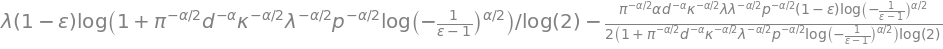

In [7]:
#Derivating the spatial throughput to gain the optimal value for p

fun_diff = sp.diff(funktio2,p2)
fun_diff

In [8]:
#Solving the optimal value for p

P = sp.nsolve(fun_diff.as_numer_denom()[0].subs(a2, a).subs(d2, d).subs(k2, k).subs(e2, e).subs(lamb2, lamb),p2,0.1)
P = float(P)
P

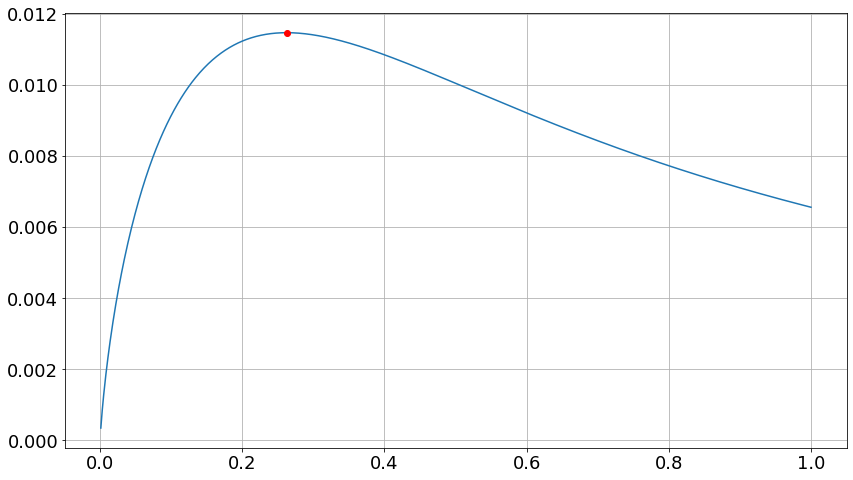

In [9]:
x  = np.linspace(0, 1, 1000)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(x, funktio2_np(x))
plt.plot(P, funktio2_np(P),'r' 'o') 
plt.grid()
plt.show()


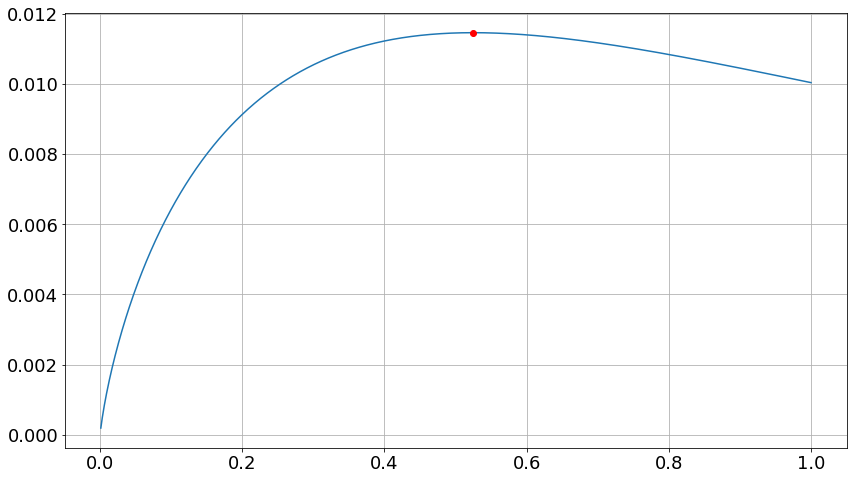

In [10]:
# C
lamb = 0.01
funktio2_np = sp.lambdify(p2, funktio2.subs(a2, a).subs(d2, d).subs(k2, k).subs(e2, e).subs(lamb2, lamb), "numpy")
P = sp.nsolve(fun_diff.as_numer_denom()[0].subs(a2, a).subs(d2, d).subs(k2, k).subs(e2, e).subs(lamb2, lamb),p2,0.5)
P = float(P)
x  = np.linspace(0, 1, 1000)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(x, funktio2_np(x))
plt.plot(P, funktio2_np(P),'r' 'o') 
plt.grid()
plt.show()

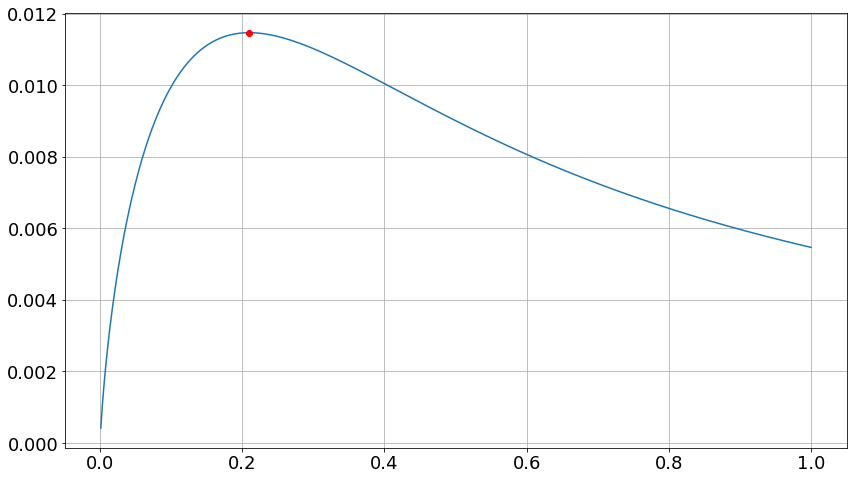

In [11]:
lamb = 0.025

funktio2_np = sp.lambdify(p2, funktio2.subs(a2, a).subs(d2, d).subs(k2, k).subs(e2, e).subs(lamb2, lamb), "numpy")

P = sp.nsolve(fun_diff.as_numer_denom()[0].subs(a2, a).subs(d2, d).subs(k2, k).subs(e2, e).subs(lamb2, lamb),p2,0.5)
P = float(P)

x  = np.linspace(0, 1, 1000)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(x, funktio2_np(x))
plt.plot(P, funktio2_np(P),'r' 'o') 
plt.grid()
plt.show()

In [12]:
lamb = 0.02
a = 4
d = 1
e = 0.05
B = sp.nsolve(funktio.as_numer_denom()[0].subs(a2, a).subs(d2, d).subs(k2, k).subs(e2, e).subs(lamb2, lamb).subs(p2, P),B2,0.5)

T_cap = float(P * lamb * (1-e) * sp.log(1+B,2))
T_cap

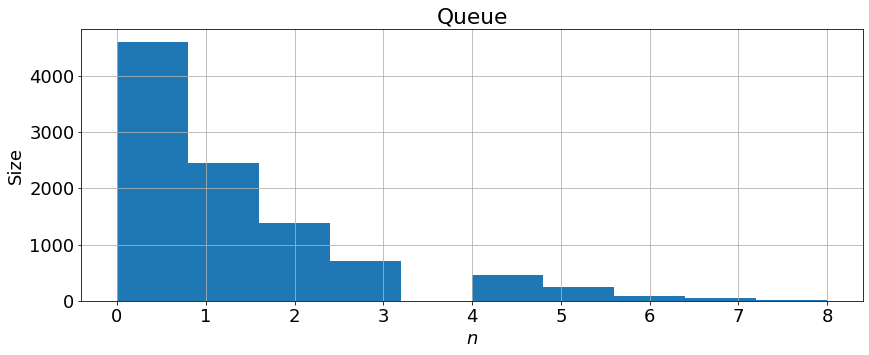

Longest queue: 8.0
Number of idle periods: 4601
Amount of idle moments: 46.01 %


In [42]:
P = 0.252441050926558
q = P-0.1
size = 10000
x = 0
arrival = np.random.binomial(1, q, size)
service = np.random.binomial(1, P, size)
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])
    
    if (queue[i] == 0):
        x = x + 1  

plt.figure(figsize=(14,5))
plt.hist(queue)
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
plt.grid(True)
plt.show() 

print('Longest queue:', np.max(queue))
print("Number of idle periods:", x)
ratio = (x/size)*100
print("Amount of idle moments:", ratio, "%")
#print(time_slots)


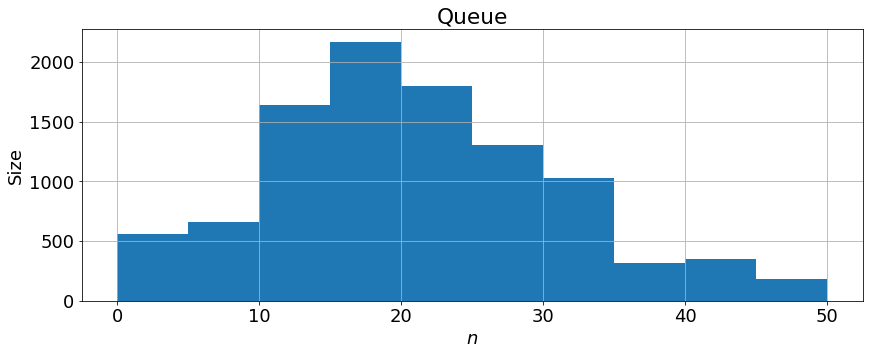

Longest queue: 50.0
Number of idle periods: 79
Amount of idle moments: 0.79 %


In [46]:
P = 0.252441050926558
q = P
size = 10000
x = 0
arrival = np.random.binomial(1, q, size)
service = np.random.binomial(1, P, size)
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])
    
    if (queue[i] == 0):
        x = x + 1  

plt.figure(figsize=(14,5))
plt.hist(queue)
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
plt.grid(True)
plt.show() 

print('Longest queue:', np.max(queue))
print("Number of idle periods:", x)
ratio = (x/size)*100
print("Amount of idle moments:", ratio, "%")
#print(time_slots)

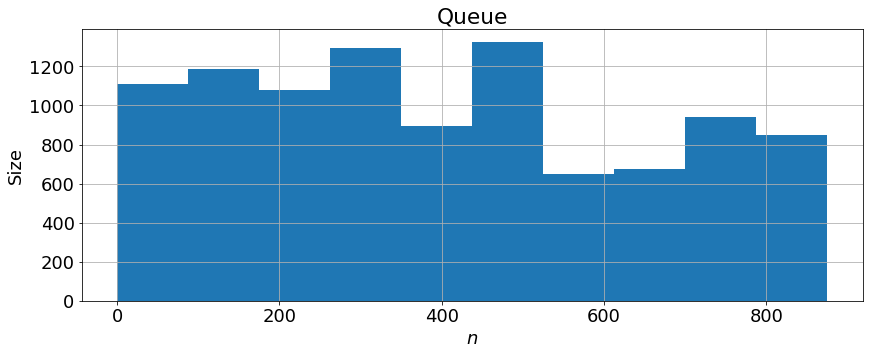

Longest queue: 875.0
Number of idle periods: 34
Amount of idle moments: 0.33999999999999997 %


In [49]:
P = 0.252441050926558
q = P+0.1
size = 10000
x = 0
arrival = np.random.binomial(1, q, size)
service = np.random.binomial(1, P, size)
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])
    
    if (queue[i] == 0):
        x = x + 1  

plt.figure(figsize=(14,5))
plt.hist(queue)
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
plt.grid(True)
plt.show() 

print('Longest queue:', np.max(queue))
print("Number of idle periods:", x)
ratio = (x/size)*100
print("Amount of idle moments:", ratio, "%")
#print(time_slots)

In [14]:
%reset

Nothing done.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc035cc0-996d-4fa3-af0c-6c39ba437636' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>